# Python ML Hands-On - Part 2

Dieses Notebook gehört zum Vortrag "Python ML Hands-On" an den Noser E-Days.

Ziel des Notebooks ist die Demonstration von Machine Learning in Python mit der Bibliothek Scikit-Learn.
Als Datengrundlage wird die in Part 1 bereinigte Tabelle mit durchschnittlichen Mietpreisen von Wohnungen sortiert nach Kanton und Anzahl Zimmern verwendet.

In [205]:
# Importieren der benötigten Bibliotheken (module)
import pandas as pd
import numpy as np
import sklearn  # scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

Die Daten werden aus dem CSV eingelesen:

In [206]:
data_path = './mietpreis_data.csv'
data = pd.read_csv(data_path, index_col=0)  # Die erste Spalte wird als Index verwendet
data.head()

,Total,1,2,3,4,5,6+
Kanton,,,,,,,
Schweiz,1362,794.0,1101,1317,1574,1910,2360
Zürich,1592,951.0,1339,1538,1835,2253,2907
Bern,1223,702.0,988,1187,1417,1691,2079
Luzern,1368,757.0,1073,1315,1509,1849,2145
Uri,1210,NaN,846,1166,1329,1541,1745


Als erstes werden die Daten visuell dargestellt, um einen Eindruck zu erhalten. Dazu wird die Bibliothek seaborn verwendet, die ein auf die Darstellung von statistischen Daten angepasstes Interface zu Matplotlib zur Verfügung stellt.

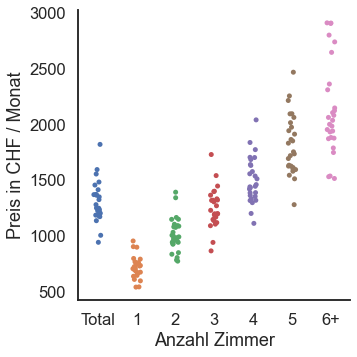

In [207]:
plot = sns.catplot(data=data)
plot.set_axis_labels('Anzahl Zimmer', 'Preis in CHF / Monat')

Auf dem Plot zu sehen ist die Verteilung des Mietpreises, sortiert nach Anzahl Zimmer. Dabei sind grössere Wohungen (erwarteterweise) teurer als kleine.

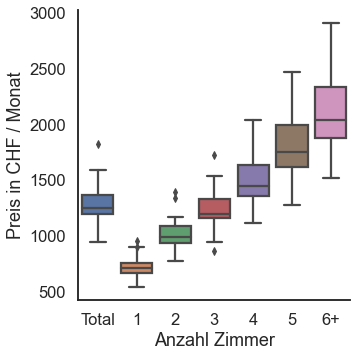

In [208]:
plot = sns.catplot(data=data, kind='box')
plot.set_axis_labels('Anzahl Zimmer', 'Preis in CHF / Monat')

Machine Learning
================
Ein erstes Ziel ist es, die Anzahl Zimmer anhand des Mietpreises zu bestimmen.

Dafür braucht es ein 'Classification'-Model. So ein Modell ermittelt für verschiedene Klassen (hier: Anzahl Zimmer) die Wahrscheinlichkeit anhand von Features ab und bestimmt dann die Klasse mit der höchsten Wahrscheinlichkeit als Resultat.
Eines der simplesten Modelle ist die logistische Regression.



In [209]:
from sklearn.linear_model import LogisticRegression

Als Datensatz X wird dabei der durchschnittliche Mietpreis aller Kantone verwendet, und die Anzahl Zimmer ist das zu ermittelnde Resultat ``y``. Sklearn erwartet die Daten in einer Tabelle, mit dem Feature ``X`` in einer Spalte und dem Resultat ``y`` in einer anderen Spalte.
Das kann sehr einfach mit Pandas ``melt`` erreicht werden.

In [210]:
mietpreis_data = data.drop(columns='Total').melt()
mietpreis_data

,variable,value
0,1,794.0
1,1,951.0
2,1,702.0
3,1,757.0
4,1,NaN
...,...,...
157,6+,2799.0
158,6+,1874.0
159,6+,2034.0
160,6+,2644.0


Es sind noch fehlende Werte vorhanden, diese lassen wir einfach weg und Teilen danach die Spalten auf. Wir haben aktuell nur ein Feature (den Preis), sklearn erwartet aber trotzdem einen Spaltenvektor, deshalb wird noch ein reshape aufgerufen

In [211]:
mietpreis_data = mietpreis_data.dropna()
X, y = mietpreis_data['value'].values, mietpreis_data['variable'].values
X = X.reshape((-1,1))

Für einen ersten Test verwenden wir alle Daten um das Modell zu trainieren

In [212]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [213]:
price_to_predict = np.array([1000,2000,1250]).reshape((-1,1))
results = model.predict(price_to_predict)
for price, result in zip(price_to_predict.flatten(), results):
    print(f'Price: {price} => predicted number of rooms: {result}')

Price: 1000 => predicted number of rooms: 2
Price: 2000 => predicted number of rooms: 6+
Price: 1250 => predicted number of rooms: 3


Erweitern des Modells
=====================
Zusätzlich zum Mietpreis kann auch noch die Information über die Wohnfläche als Information mit einbezogen werden.

In [214]:
data = pd.read_csv('./wohnflaeche.csv', index_col=0)
data.head()

,Total,1,2,3,4,5,6+
Kanton,,,,,,,
Schweiz,99.1,36.0,57.8,79.8,106.0,137.9,177.6
Zürich,97.2,38.5,60.5,80.3,105.7,139.3,183.0
Bern,95.4,33.9,56.2,77.8,103.2,134.0,169.3
Luzern,104.0,34.8,57.7,81.3,105.3,138.3,172.9
Uri,101.8,30.6,53.6,78.7,100.2,130.0,162.4


Damit wird die gleiche Transformation wie mit dem Mietpreis vorgenommen

In [215]:
wohnflaeche_data = data.drop(columns='Total').melt()
wohnflaeche_data 

,variable,value
0,1,36.0
1,1,38.5
2,1,33.9
3,1,34.8
4,1,30.6
...,...,...
157,6+,190.7
158,6+,177.6
159,6+,173.0
160,6+,189.6


Anschliessend werden die Daten zusammengeführt:

In [216]:
erweiterte_daten = wohnflaeche_data.join(mietpreis_data, rsuffix='_miet_data').dropna()
erweiterte_daten

,variable,value,variable_miet_data,value_miet_data
0,1,36.0,1,794.0
1,1,38.5,1,951.0
2,1,33.9,1,702.0
3,1,34.8,1,757.0
5,1,34.4,1,744.0
...,...,...,...,...
157,6+,190.7,6+,2799.0
158,6+,177.6,6+,1874.0
159,6+,173.0,6+,2034.0
160,6+,189.6,6+,2644.0


In [217]:
erweiterte_daten = erweiterte_daten.drop(columns='variable_miet_data').rename(columns={'variable': 'zimmer', 'value': 'flaeche', 'value_miet_data': 'mietpreis'})
erweiterte_daten

,zimmer,flaeche,mietpreis
0,1,36.0,794.0
1,1,38.5,951.0
2,1,33.9,702.0
3,1,34.8,757.0
5,1,34.4,744.0
...,...,...,...
157,6+,190.7,2799.0
158,6+,177.6,1874.0
159,6+,173.0,2034.0
160,6+,189.6,2644.0


Jetzt kann wieder ein Modell trainiert werden:

In [218]:
model_with_two_features = LogisticRegression()
X = erweiterte_daten[['flaeche', 'mietpreis']]
y = erweiterte_daten['zimmer']
model_with_two_features.fit(X,y)


c:\users\simon.haerdi\documents\pythonproject\edays\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Hier ist offenbar etwas schief gegangen, der Optimierer konnte keine Lösung finden. Das liegt an den unterschiedlichen Grössenordnungen der Variablen. Die Lösung dafür ist, die Features zuerst zu skalieren:

In [219]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
print(X[:10,:])

[[-1.33106376 -1.15852264]
 [-1.27853093 -0.86364176]
 [-1.37519134 -1.33131907]
 [-1.35627952 -1.22801686]
 [-1.36468477 -1.25243374]
 [-1.4319268  -1.53604529]
 [-1.38779922 -1.40456974]
 [-1.34787427 -1.64122573]
 [-1.37098871 -0.9688222 ]
 [-1.43612942 -1.34822307]]


Jetzt klappt auch das trainieren des Modells:

In [220]:
model_with_two_features.fit(X,y)

LogisticRegression()

Anschliessend kann das Modell wieder verwendet werden, um für eine fiktive Wohnung die Anzahl Zimmer vorherzusagen:

In [221]:
to_predict = pd.DataFrame.from_dict({
    'flaeche': [50.9], 'mietpreis':[1000]
})
to_predict

,flaeche,mietpreis
0,50.9,1000


In [222]:
result = model_with_two_features.predict(to_predict)
print(f'Resultat: {result[0]} Zimmer')

Resultat: 6+ Zimmer


Das Resultat ist offensichtlich falsch. Das Problem ist, dass die Trainingsdaten skaliert wurden, der Input aber nicht. Richtige Lösung:

In [223]:
result = model_with_two_features.predict(scaler.transform(to_predict))
print(f'Resultat: {result[0]} Zimmer')

Resultat: 2 Zimmer


Pipelines
=========
Im obigen Beispiel wurden Daten zuerst transformiert und dann für das Modell verwendet. Anschliessend müssen neue Daten ebenfalls zuerst transformiert werden.
Dieses Vorgehen kann in einer Pipeline zusammengefasst werden:

In [224]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', preprocessing.StandardScaler()),
    ('model', LogisticRegression()),
])

Die Pipeline verhält sich genau gleich wie das Modell, nur dass alle Inputs zuerst skaliert werden:

In [225]:
X = erweiterte_daten[['flaeche', 'mietpreis']]
y = erweiterte_daten['zimmer']
pipeline.fit(X,y)
result = pipeline.predict(to_predict)
print(f'Resultat: {result[0]} Zimmer')

Resultat: 2 Zimmer


Bewerten des Modells
====================
Um das Modell bewerten zu können, teilen wir die bekannten Daten in einen Training- und einen Test-Datensatz auf:

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Das Modell wird jetzt nur noch mit dem Trainings-Datensatz trainiert, und anschliessend wird mit dem Test-Datensatz geschaut, wie gut das Modell ist

In [227]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [228]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
predicted_results = pipeline.predict(X_test)
cf_matrix = confusion_matrix(y_test, predicted_results)
cf_matrix

array([[5, 0, 0, 0, 0, 0],
       [1, 5, 0, 0, 0, 0],
       [0, 0, 7, 1, 0, 0],
       [0, 0, 0, 7, 1, 0],
       [0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 0, 5]], dtype=int64)

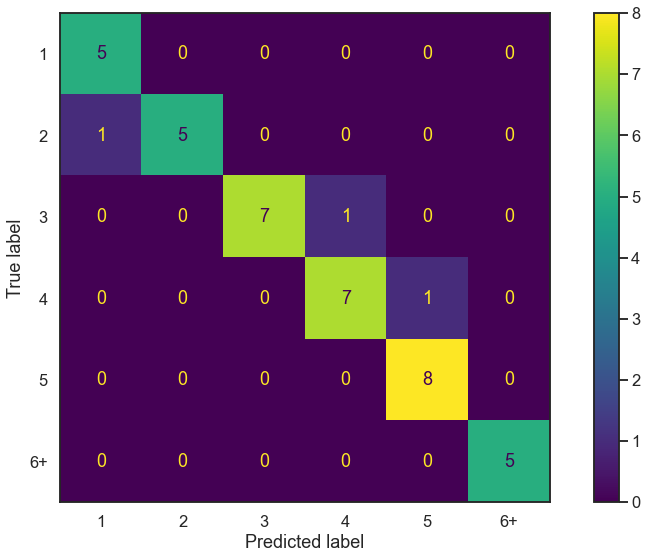

In [229]:
sns.set_style('white')
fig, axis = plt.subplots(figsize=(16,9))
plot_confusion_matrix(pipeline, X_test, y_test, ax=axis)